# Q1
Perform principal component analysis (PCA) and project the high dimensional CT embeddings to 100 and 50 dimensions. Also, report the reconstruction error as a plot of number of
principal components.

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import scipy.io
import os
from sklearn.metrics import mean_squared_error

In [3]:
mat = scipy.io.loadmat('ctscan_embeddings_hw2 (1).mat')
mat=mat['feat']
print(f'The original number of features is {mat.shape[1]}')
orig_feat = mat.shape[1]

The original number of features is 1024


In [4]:
def reconstruction_loss(mat,dim,flag=False):
    
    pca = PCA(n_components=dim)
    pca.fit(mat)
    mat_pca = pca.transform(mat)
    mat_projected = pca.inverse_transform(mat_pca)
    if flag==True:
        print(f'The explained Variance by {dim} components is {sum(pca.explained_variance_ratio_)}')
    return mean_squared_error(mat,mat_projected)

In [5]:
x = reconstruction_loss(mat, orig_feat,True)

The explained Variance by 1024 components is 1.0000000454829054


In [6]:
x = reconstruction_loss(mat,100,True)

The explained Variance by 100 components is 0.9867141642898787


In [7]:
x =reconstruction_loss(mat,50,True)

The explained Variance by 50 components is 0.9676109834690578


In [8]:
losses = []
step = 20
for i in range(1,1000,step):
    losses.append(reconstruction_loss(mat,i))

Text(0.5, 1.0, 'Reconstruction Loss vs Number of Components')

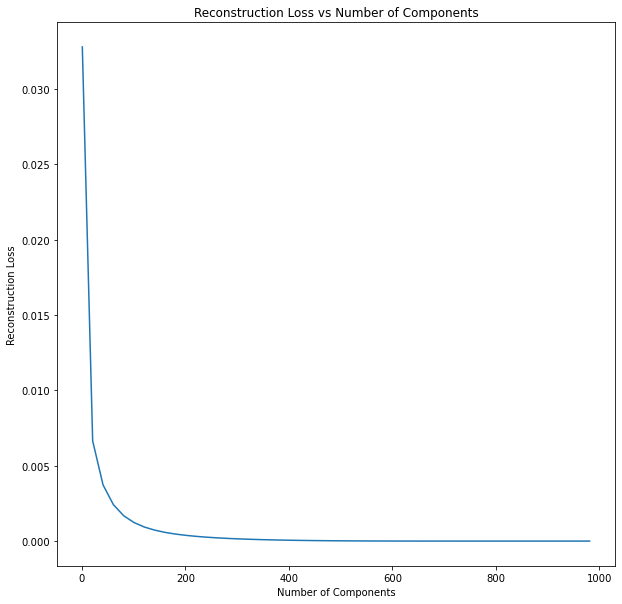

In [9]:
losses = np.array(losses).squeeze()
plt.figure(figsize=(10,10))
plt.plot(list(range(1,1000,step)),losses)
plt.xlabel('Number of Components')
plt.ylabel("Reconstruction Loss")
plt.title("Reconstruction Loss vs Number of Components")

# Q2
Split the PCA projected embeddings into 70% training, 10% validation and 20% testing.
Apply SVM with Linear kerenl and RBF kernel to classify these embeddings into Normal,
Mild and Severe categories. Report the Accuracy and F1-score on training and testing set
for all the classes.

In [10]:
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split

In [12]:
infection = scipy.io.loadmat('infmsk_hw1.mat')
infection_mask = infection['infmsk']
target_names = ['Normal', 'Mild', 'Severe']


In [13]:
def infection(sample):
    rate = np.sum(sample ==1) /(np.sum(sample!=0))
    return rate

In [17]:
label = []
for i in range(infection_mask.shape[2]):
    R = infection(infection_mask[:,:,i])
    if R == 0:
        label.append(0)
    elif R > 0.4:
        label.append(2)
    else:
        label.append(1)

In [18]:
def f1_val(train,train_label,val,val_label,kernel = 'linear'):
    clf = svm.SVC(decision_function_shape='ovo', kernel=kernel)
    clf.fit(train, train_label)
    val_predict = clf.predict(val)
    return sklearn.metrics.f1_score(val_label,val_predict,average = 'weighted')

## Linear

In [19]:
F1_linear = []
for i in range(10,500,10):
    pca = PCA(n_components = i)
    pca.fit(mat)
    mat_reinvented = pca.transform(mat)
    train,test,train_label,test_label = train_test_split(mat_reinvented,label,test_size = 0.3)
    test, val,test_label,val_label= train_test_split(test,test_label,test_size = 1/3)
    F1_linear.append(f1_val(train,train_label,val,val_label,kernel = 'linear'))

Text(0.5, 1.0, 'F1_scores vs Number of Components for linear kernel')

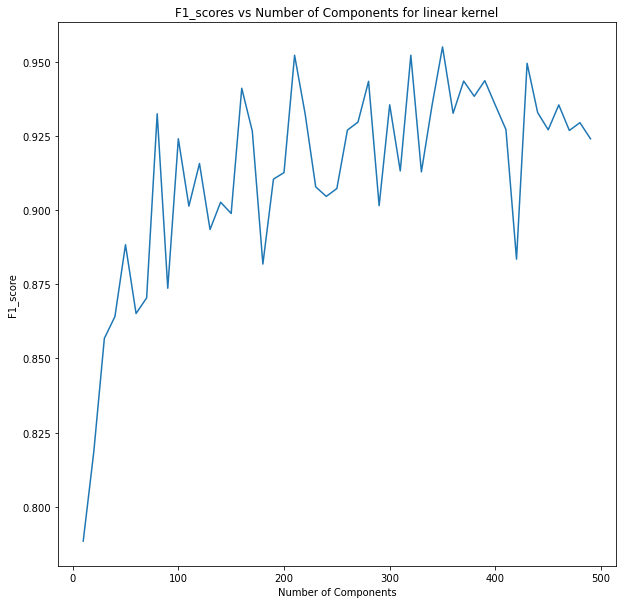

In [20]:
F1_scores = np.array(F1_linear).squeeze()
plt.figure(figsize=(10,10))
plt.plot(list(range(10,500,10)),F1_scores)
plt.xlabel('Number of Components')
plt.ylabel("F1_score")
plt.title("F1_scores vs Number of Components for linear kernel")

From the above graph, it canbe deduced that 200 components shall be enough to retain the faithfullness of the present data

In [25]:
pca = PCA(n_components = 200)
pca.fit(mat)
mat_reinvented = pca.transform(mat)
train,test,train_label,test_label = train_test_split(mat_reinvented,label,test_size = 0.3)
test, val,test_label,val_label= train_test_split(test,test_label,test_size = 1/3)
clf = svm.SVC(decision_function_shape='ovo', kernel="linear")
clf.fit(train, train_label)
train_predict = clf.predict(train)
val_predict = clf.predict(val)
test_predict = clf.predict(test)
print("For training set")
print(sklearn.metrics.classification_report(train_label,train_predict,target_names=target_names))
print('For val set')
print(sklearn.metrics.classification_report(val_label,val_predict,target_names=target_names))
print("---------------------------------------")
print('For test set')
print(sklearn.metrics.classification_report(test_label,test_predict,target_names=target_names))


For training set
              precision    recall  f1-score   support

      Normal       0.92      0.95      0.94       999
        Mild       0.96      0.94      0.95      1370
      Severe       0.99      0.93      0.96       118

    accuracy                           0.95      2487
   macro avg       0.96      0.94      0.95      2487
weighted avg       0.95      0.95      0.95      2487

For val set
              precision    recall  f1-score   support

      Normal       0.93      0.92      0.93       143
        Mild       0.93      0.95      0.94       198
      Severe       1.00      0.80      0.89        15

    accuracy                           0.93       356
   macro avg       0.95      0.89      0.92       356
weighted avg       0.93      0.93      0.93       356

---------------------------------------
For test set
              precision    recall  f1-score   support

      Normal       0.93      0.94      0.93       299
        Mild       0.94      0.95      0.94    

## RBF

In [22]:
F1_rbf = []
for i in range(10,500,10):
    pca = PCA(n_components = i)
    pca.fit(mat)
    mat_reinvented = pca.transform(mat)
    train,test,train_label,test_label = train_test_split(mat_reinvented,label,test_size = 0.3)
    test, val,test_label,val_label= train_test_split(test,test_label,test_size = 1/3)
    F1_rbf.append(f1_val(train,train_label,val,val_label,kernel = 'linear'))

Text(0.5, 1.0, 'F1_scores vs Number of Components for rbf kernel')

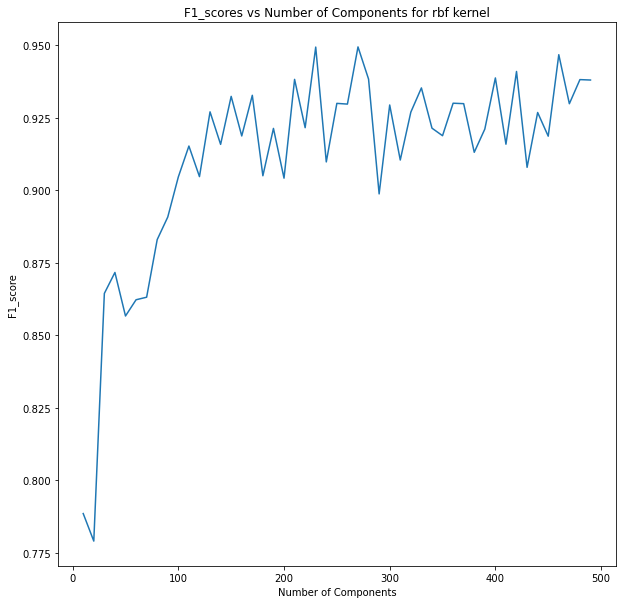

In [23]:
F1_scores = np.array(F1_rbf).squeeze()
plt.figure(figsize=(10,10))
plt.plot(list(range(10,500,10)),F1_scores)
plt.xlabel('Number of Components')
plt.ylabel("F1_score")
plt.title("F1_scores vs Number of Components for rbf kernel")

From the above graph, it canbe deduced that 260 components shall be enough to retain the faithfullness of the present data for RBF kernel

In [26]:
pca = PCA(n_components = 260)
pca.fit(mat)
mat_reinvented = pca.transform(mat)
train,test,train_label,test_label = train_test_split(mat_reinvented,label,test_size = 0.3)
test, val,test_label,val_label= train_test_split(test,test_label,test_size = 1/3)
clf = svm.SVC(decision_function_shape='ovo', kernel="rbf")
clf.fit(train, train_label)
train_predict = clf.predict(train)
val_predict = clf.predict(val)
test_predict = clf.predict(test)
print('For train set')
print(sklearn.metrics.classification_report(train_label,train_predict,target_names=target_names))
print('For val set')
print(sklearn.metrics.classification_report(val_label,val_predict,target_names=target_names))
print("---------------------------------------")
print('For test set')
print(sklearn.metrics.classification_report(test_label,test_predict,target_names=target_names))


For train set
              precision    recall  f1-score   support

      Normal       0.87      0.95      0.91      1039
        Mild       0.95      0.90      0.93      1343
      Severe       1.00      0.73      0.85       105

    accuracy                           0.92      2487
   macro avg       0.94      0.86      0.89      2487
weighted avg       0.92      0.92      0.92      2487

For val set
              precision    recall  f1-score   support

      Normal       0.87      0.95      0.91       124
        Mild       0.95      0.93      0.94       210
      Severe       1.00      0.59      0.74        22

    accuracy                           0.92       356
   macro avg       0.94      0.83      0.86       356
weighted avg       0.92      0.92      0.92       356

---------------------------------------
For test set
              precision    recall  f1-score   support

      Normal       0.89      0.96      0.93       278
        Mild       0.95      0.93      0.94       